# 🫀 Heart Disease Prediction - End to End Project

This notebook covers the entire process from loading the dataset to building a predictive model and evaluating it.

#### 1 - Import Libraries

In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

#### 2 - Data Collection

In [22]:
# 2. Load Dataset
path = "G:\Projects EDA\Datasets\heart.csv"
df = pd.read_csv(path)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# 2.1 - Basic Statistics
print("Dataset Shape: ", df.shape)
print("\nData Information: ", df.info())
print("\nSummary Statistics: ", display(df.describe(include='all')))

Dataset Shape:  (918, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

Data Information:  None


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000



Summary Statistics:  None


#### 3 - EDA

###### 3.1 - Target variable distribution

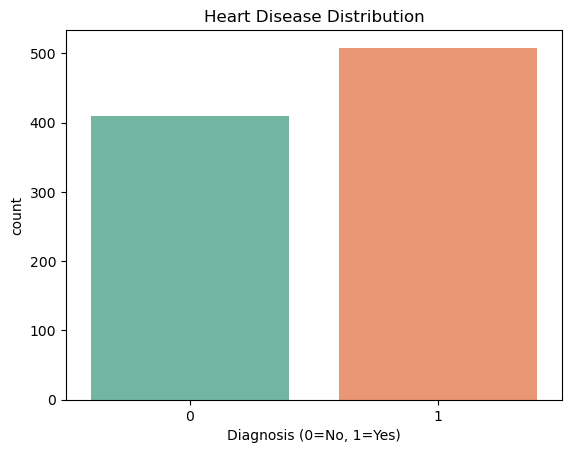

In [4]:
sns.countplot(x='HeartDisease', data=df, palette='Set2')
plt.title('Heart Disease Distribution')
plt.xlabel('Diagnosis (0=No, 1=Yes)')
plt.show()

###### 3.2 - Age Distribution by diagnosis

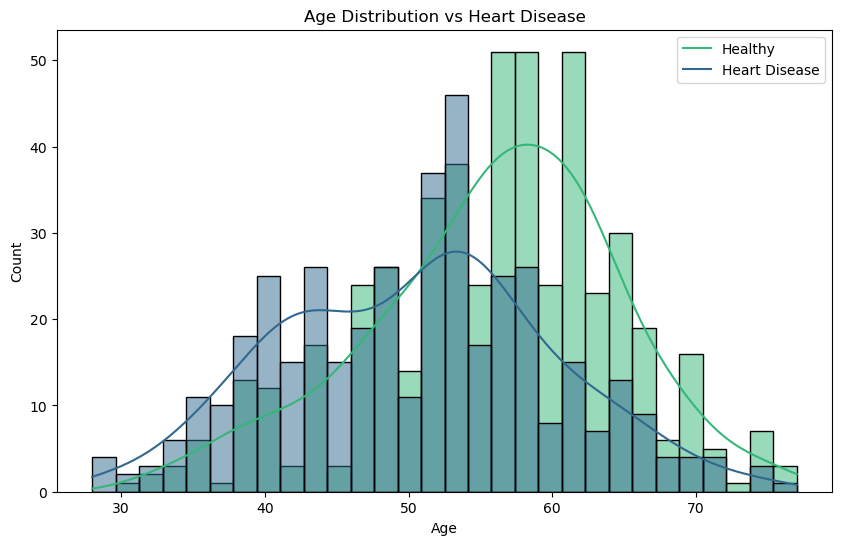

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='HeartDisease', kde=True, bins=30, palette='viridis')
plt.title('Age Distribution vs Heart Disease')
plt.legend(['Healthy', 'Heart Disease'])
plt.show()

###### 3.3 - Categorical Features Analysis

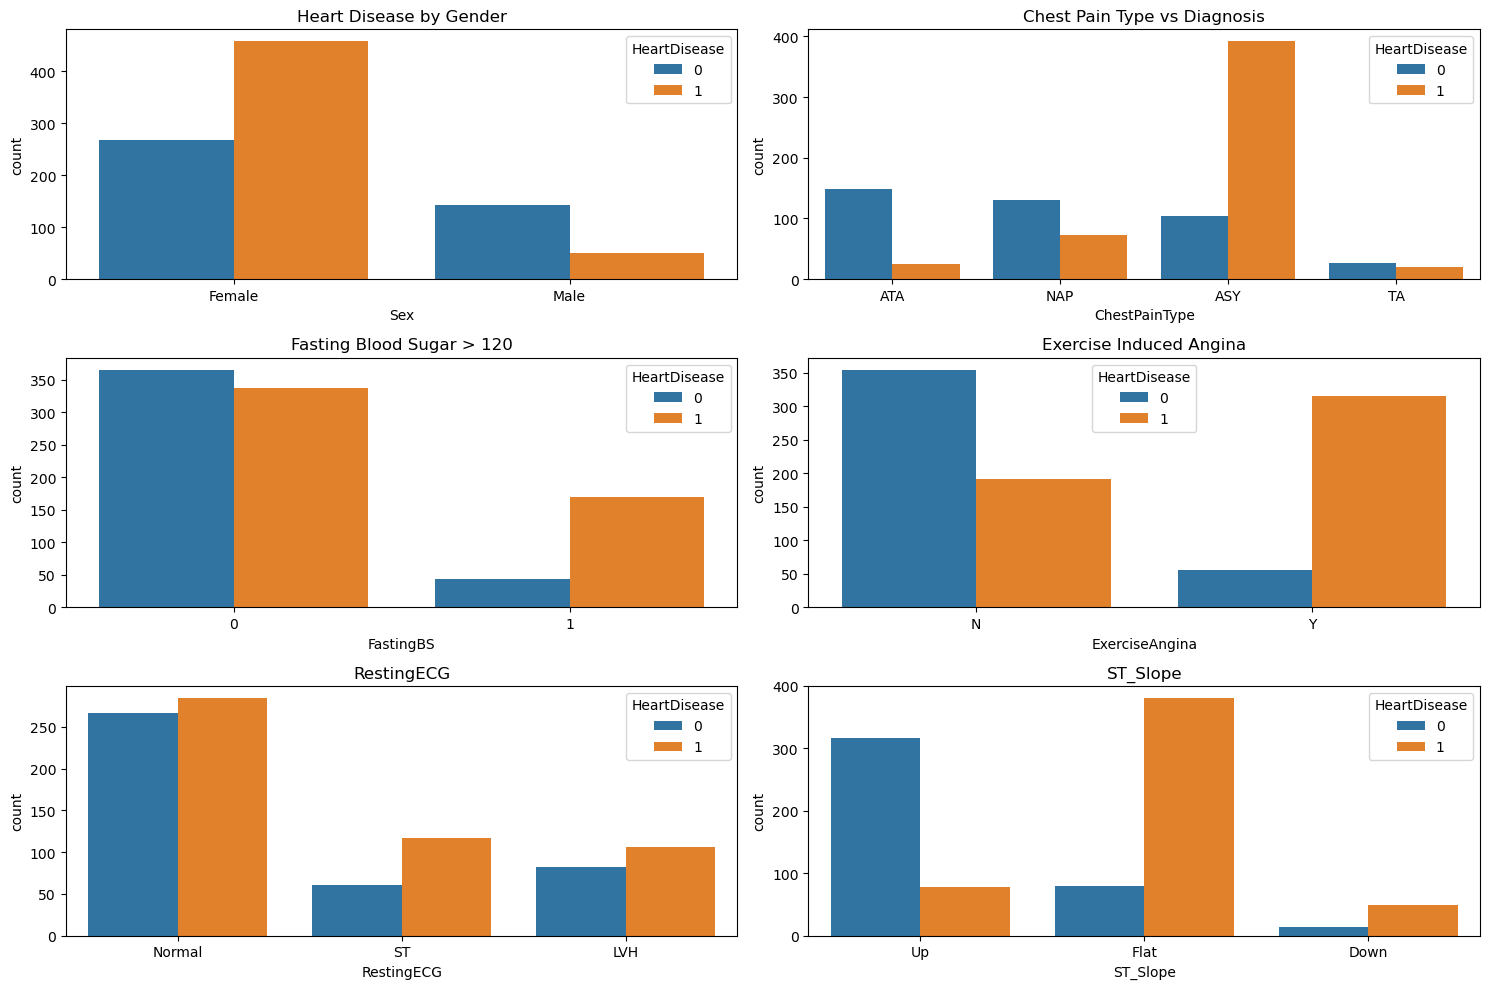

In [6]:
fig, axes = plt.subplots(3, 2, figsize=(15,10))

sns.countplot(x='Sex', hue='HeartDisease', data=df, ax=axes[0,0])
axes[0,0].set_title('Heart Disease by Gender')
axes[0,0].set_xticklabels(['Female', 'Male'])

sns.countplot(x='ChestPainType', hue='HeartDisease', data=df, ax=axes[0,1])
axes[0,1].set_title('Chest Pain Type vs Diagnosis')

sns.countplot(x='FastingBS', hue='HeartDisease', data=df, ax=axes[1,0])
axes[1,0].set_title('Fasting Blood Sugar > 120')

sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=df, ax=axes[1,1])
axes[1,1].set_title('Exercise Induced Angina')

sns.countplot(x='RestingECG', hue='HeartDisease', data=df, ax=axes[2,0])
axes[2,0].set_title('RestingECG')

sns.countplot(x='ST_Slope', hue='HeartDisease', data=df, ax=axes[2,1])
axes[2,1].set_title('ST_Slope')

plt.tight_layout()
plt.show()

###### 3.4 - Numeric Features with diagnosis

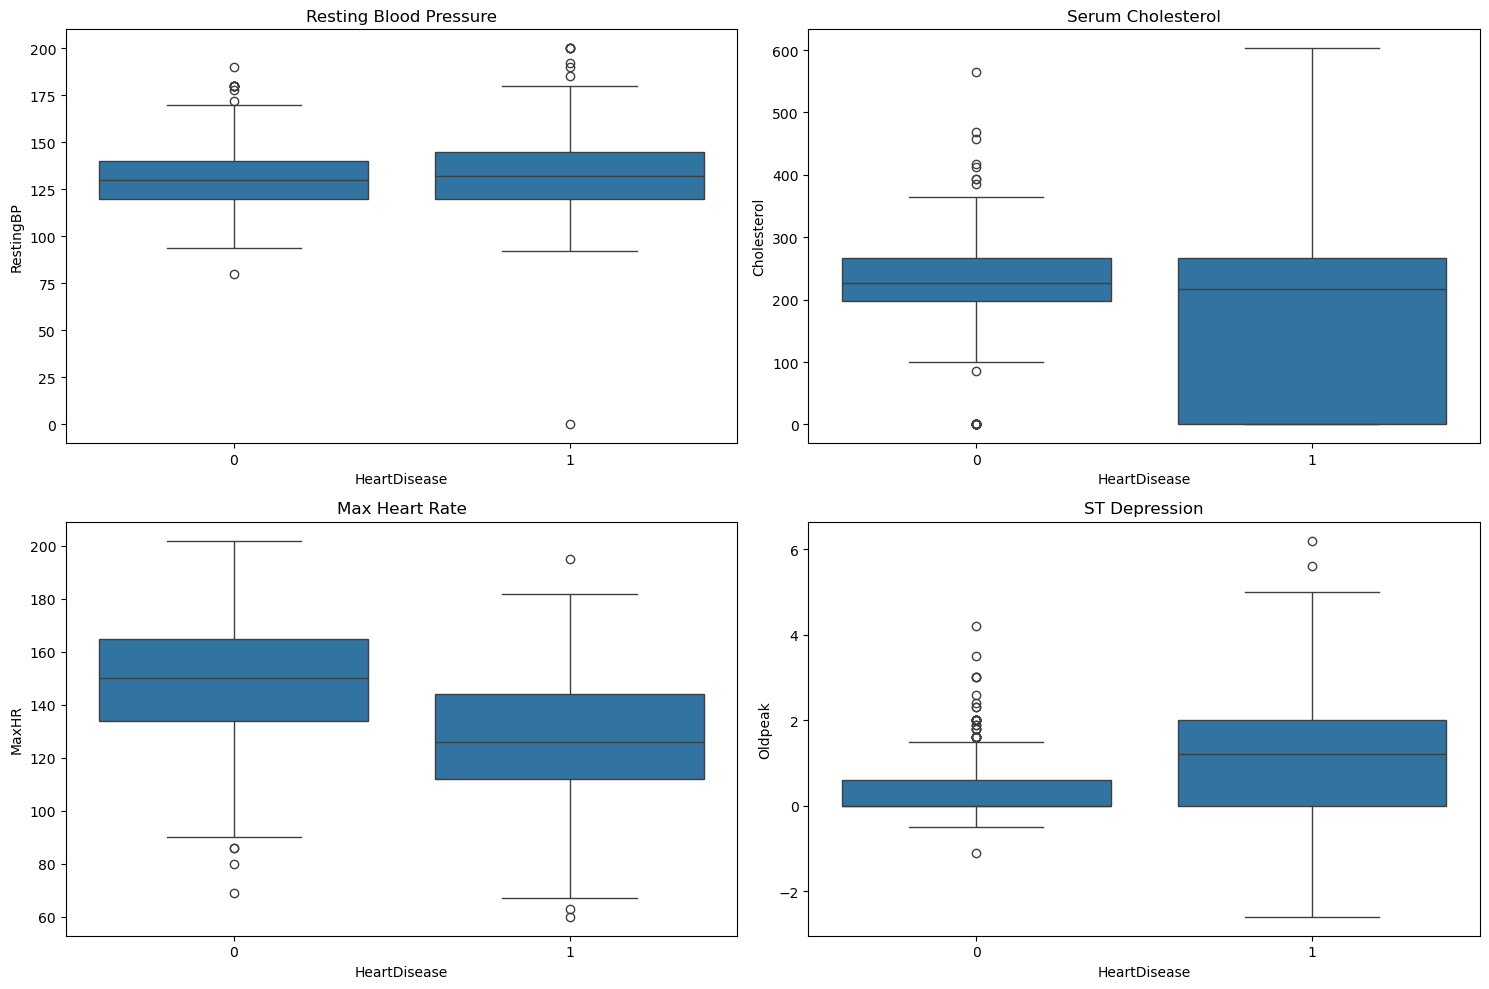

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

sns.boxplot(x='HeartDisease', y='RestingBP', data=df, ax=axes[0,0])
axes[0,0].set_title('Resting Blood Pressure')

sns.boxplot(x='HeartDisease', y='Cholesterol', data=df, ax=axes[0,1])
axes[0,1].set_title('Serum Cholesterol')

sns.boxplot(x='HeartDisease', y='MaxHR', data=df, ax=axes[1,0])
axes[1,0].set_title('Max Heart Rate')

sns.boxplot(x='HeartDisease', y='Oldpeak', data=df, ax=axes[1,1])
axes[1,1].set_title('ST Depression')

plt.tight_layout()
plt.show()

###### 3.5 - Risk Factor Pair Plots

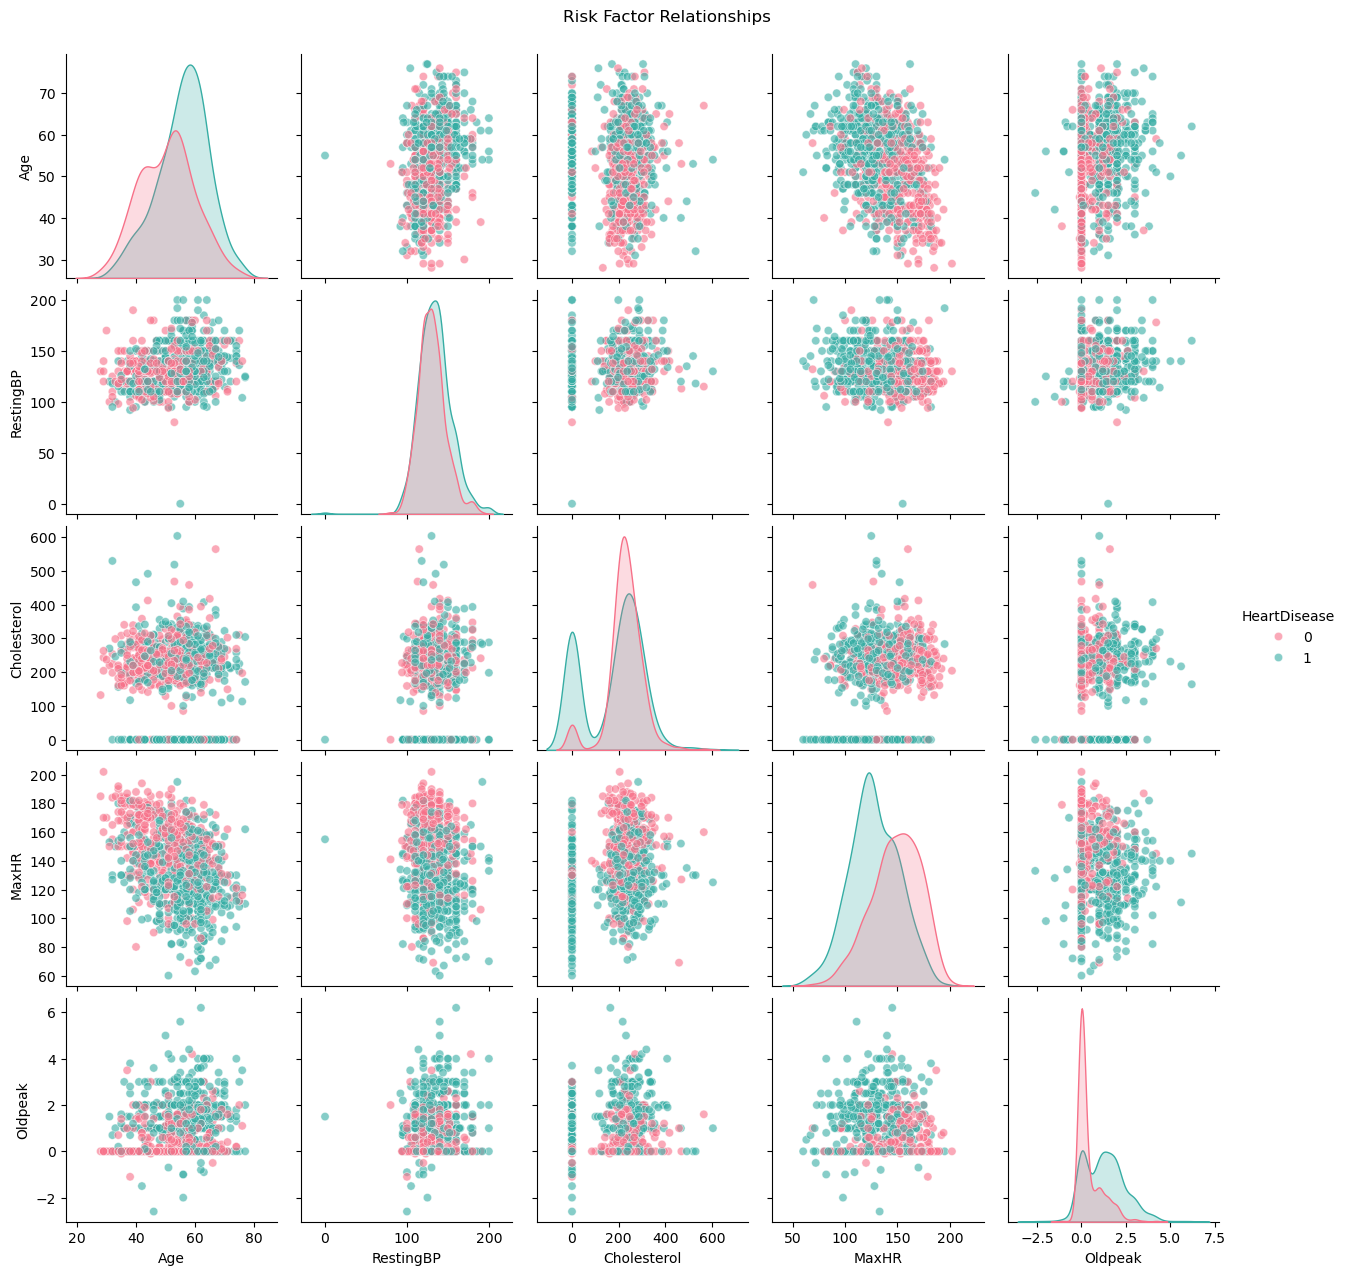

In [8]:
sns.pairplot(df[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak','HeartDisease']],
             hue= 'HeartDisease',
             palette='husl',
             plot_kws={'alpha':0.6})
plt.suptitle('Risk Factor Relationships', y=1.02)
plt.show()

###### 3.6 - Advanced Violin Plots

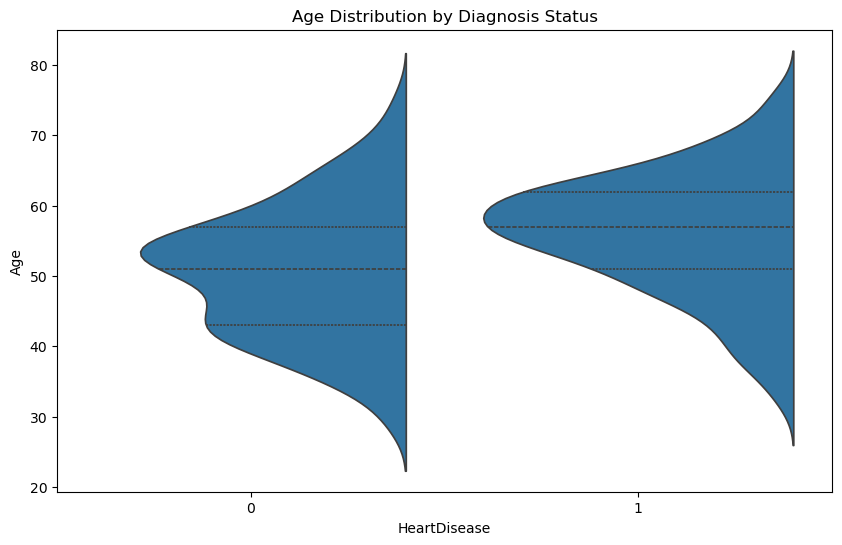

In [9]:
plt.figure(figsize=(10,6))
sns.violinplot(x='HeartDisease', y='Age', data=df, inner='quartile', split=True)
plt.title('Age Distribution by Diagnosis Status')
plt.show()

#### 4 - Data Preprocessing

###### 1 - Handling Missing Values

In [10]:
# Check for missing values
print(df.isnull().sum())

# For this dataset, missing values are typically in 'ca' and 'thal' columns
# We'll use median for numerical and mode for categorical features

from sklearn.impute import SimpleImputer

# Numerical columns
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


###### 2 - Feature Engineering

In [11]:
# Create new features that might be predictive
df['BP_HR_Ratio'] = df['RestingBP'] / df['MaxHR']
df['Chol_Age_Ratio'] = df['Cholesterol'] / df['Age']
df['Oldpeak_Age_Interaction'] = df['Oldpeak'] * df['Age']

###### 3 - Handling Outliers

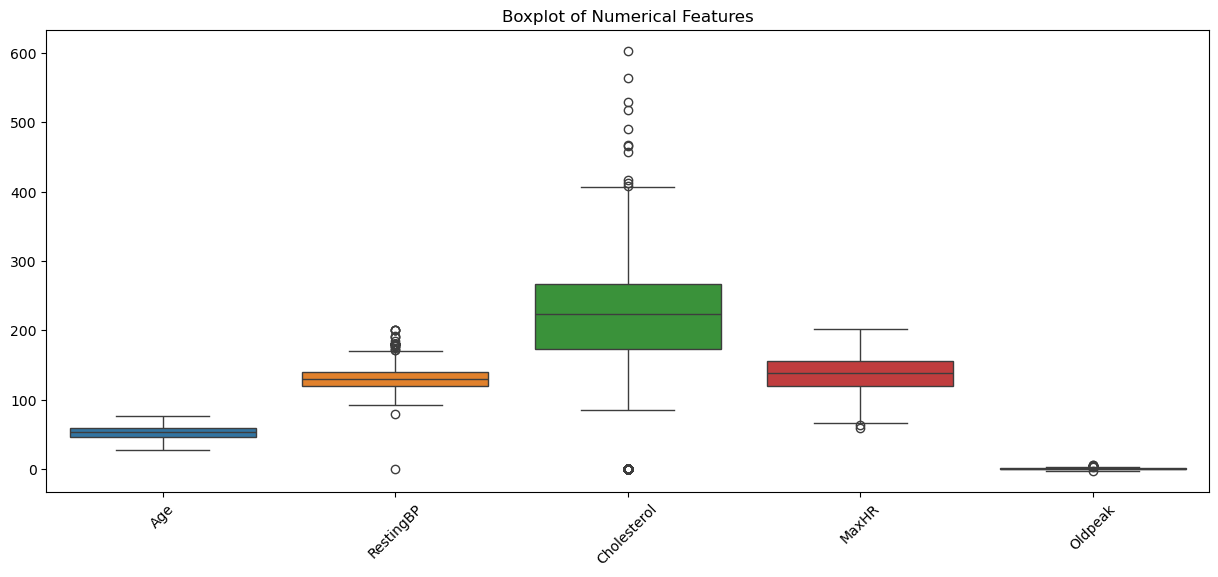

In [12]:
# Visualize outliers using boxplots
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[num_cols])
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

# Function to handle outliers using IQR method
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Apply to numerical columns
for col in num_cols:
    df = cap_outliers(df, col)

###### 4. Encode Categorical Variables

In [13]:
# Binary encoding for binary categorical features
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})

# One-hot encoding for nominal categorical features
df = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)

###### 5 - Scale Numerical Features

In [14]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

###### 6. Handle Class Imbalance (if needed)

In [15]:
if df['HeartDisease'].value_counts()[0] / df['HeartDisease'].value_counts()[1] > 1.5:
    from sklearn.utils import resample
    df_majority = df[df.HeartDisease==0]
    df_minority = df[df.HeartDisease==1]
    
    df_minority_upsampled = resample(df_minority, 
                                    replace=True,
                                    n_samples=len(df_majority),
                                    random_state=42)
    df = pd.concat([df_majority, df_minority_upsampled])

###### 7 - Final Feature Selection

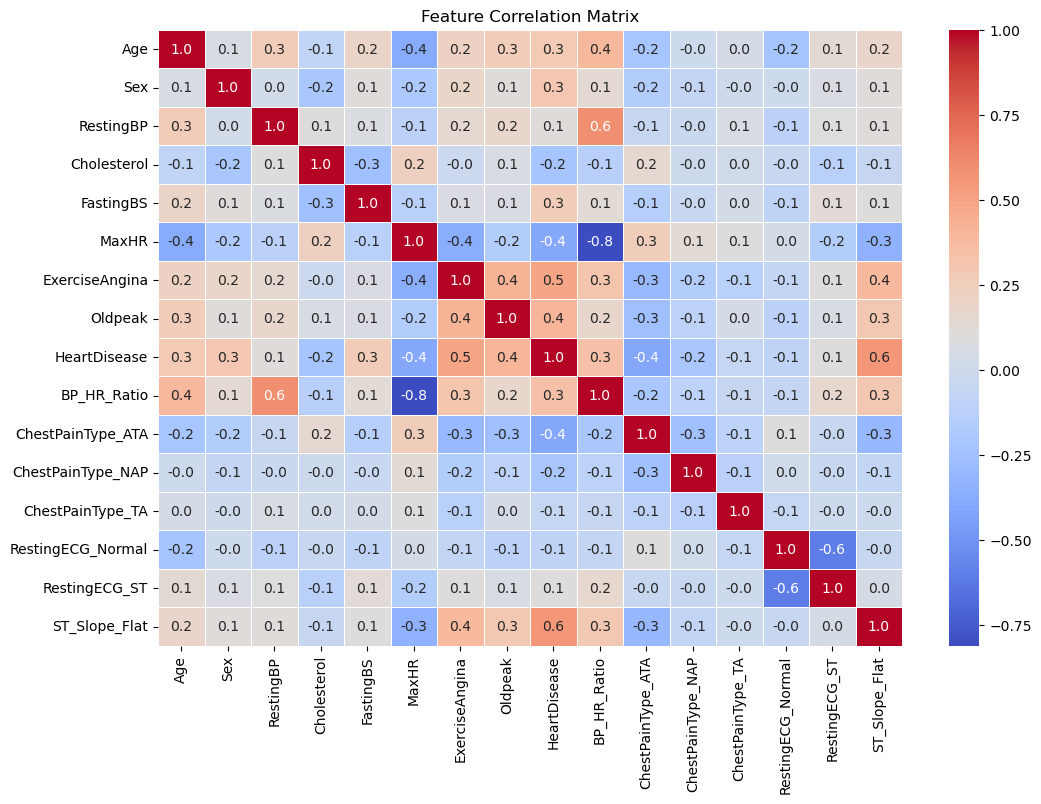

In [16]:
# Remove highly correlated features if any
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
df = df.drop(to_drop, axis=1)

# Correlation Matrix
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.1f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()


###### 8 - Train-Test Split

In [17]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

###### 9. Create Preprocessing Pipeline (for production)

In [18]:
# Define column types
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak',
                   'BP_HR_Ratio', 'Chol_Age_Ratio', 'Oldpeak_Age_Interaction']
binary_features = ['Sex', 'ExerciseAngina', 'FastingBS']
categorical_features = [col for col in df.columns if col.startswith(('ChestPainType', 'RestingECG', 'ST_Slope'))]

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('binary', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features)])

# Full pipeline can be created by adding a classifier
# pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                          ('classifier', YourClassifier())]) 

print("Preprocessing completed successfully!")
print(f"Final training set shape: {X_train.shape}")
print(f"Final test set shape: {X_test.shape}")

Preprocessing completed successfully!
Final training set shape: (734, 15)
Final test set shape: (184, 15)


#### 5 - Model Training

In [19]:
# 5. Model Training
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.907608695652174


#### 6 - Model Evaluation

In [20]:
# 6. Model Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[71 11]
 [ 6 96]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        82
           1       0.90      0.94      0.92       102

    accuracy                           0.91       184
   macro avg       0.91      0.90      0.91       184
weighted avg       0.91      0.91      0.91       184



#### 7 - Save Model

In [21]:
# 7. Save Model
joblib.dump(model, "heart_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']